## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
from keras import optimizers

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.2, 0.5, 0.7]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for d in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy",
                  metrics=["accuracy"],
                  optimizer=optimizer,
                 )
    
    model.fit(x_train, y_train,
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test),
             )
    exp_tag = "dropout_ratio %s" % (str(d))
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    results[exp_tag] = {'train-loss': train_loss,
                        'valid-loss': valid_loss,
                        'train-accuracy': train_acc,
                        'valid-accuracy': valid_acc}


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

196/196 [==============================] - 8s 39ms/step - loss: 1.4374 - accuracy: 0.4856 - val_loss: 1.4197 - val_accuracy: 0.4937
Epoch 47/50
196/196 [==============================] - 8s 40ms/step - loss: 1.4492 - accuracy: 0.4811 - val_loss: 1.4150 - val_accuracy: 0.4947
Epoch 48/50
196/196 [==============================] - 8s 41ms/step - loss: 1.4289 - accuracy: 0.4854 - val_loss: 1.4254 - val_accuracy: 0.4877
Epoch 49/50
196/196 [==============================] - 8s 39ms/step - loss: 1.4212 - accuracy: 0.4889 - val_loss: 1.4099 - val_accuracy: 0.4996
Epoch 50/50
196/196 [==============================] - 8s 39ms/step - loss: 1.4324 - accuracy: 0.4845 - val_loss: 1.4136 - val_accuracy: 0.4985
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden

196/196 [==============================] - 8s 40ms/step - loss: 1.4588 - accuracy: 0.4771 - val_loss: 1.4291 - val_accuracy: 0.4941
Epoch 42/50
196/196 [==============================] - 8s 41ms/step - loss: 1.4542 - accuracy: 0.4796 - val_loss: 1.4626 - val_accuracy: 0.4868
Epoch 43/50
196/196 [==============================] - 8s 40ms/step - loss: 1.4597 - accuracy: 0.4792 - val_loss: 1.4297 - val_accuracy: 0.4956
Epoch 44/50
196/196 [==============================] - 8s 40ms/step - loss: 1.4488 - accuracy: 0.4796 - val_loss: 1.4137 - val_accuracy: 0.4999
Epoch 45/50
196/196 [==============================] - 8s 40ms/step - loss: 1.4469 - accuracy: 0.4835 - val_loss: 1.4381 - val_accuracy: 0.4903
Epoch 46/50
196/196 [==============================] - 8s 40ms/step - loss: 1.4419 - accuracy: 0.4832 - val_loss: 1.4225 - val_accuracy: 0.4956
Epoch 47/50
196/196 [==============================] - 8s 40ms/step - loss: 1.4378 - accuracy: 0.4843 - val_loss: 1.4150 - val_accuracy: 0.4950
Epoc

196/196 [==============================] - 8s 40ms/step - loss: 1.4934 - accuracy: 0.4665 - val_loss: 1.4558 - val_accuracy: 0.4773
Epoch 37/50
196/196 [==============================] - 8s 40ms/step - loss: 1.4892 - accuracy: 0.4665 - val_loss: 1.4629 - val_accuracy: 0.4803
Epoch 38/50
196/196 [==============================] - 8s 40ms/step - loss: 1.4817 - accuracy: 0.4672 - val_loss: 1.4620 - val_accuracy: 0.4843
Epoch 39/50
196/196 [==============================] - 8s 40ms/step - loss: 1.4927 - accuracy: 0.4659 - val_loss: 1.4925 - val_accuracy: 0.4715
Epoch 40/50
196/196 [==============================] - 8s 40ms/step - loss: 1.4847 - accuracy: 0.4683 - val_loss: 1.4488 - val_accuracy: 0.4893
Epoch 41/50
196/196 [==============================] - 8s 40ms/step - loss: 1.4758 - accuracy: 0.4717 - val_loss: 1.4293 - val_accuracy: 0.4876
Epoch 42/50
196/196 [==============================] - 8s 40ms/step - loss: 1.4662 - accuracy: 0.4733 - val_loss: 1.4227 - val_accuracy: 0.4962
Epoc

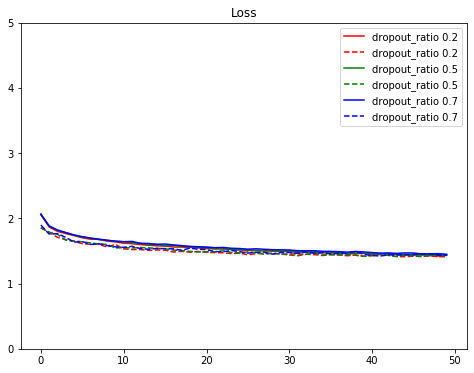

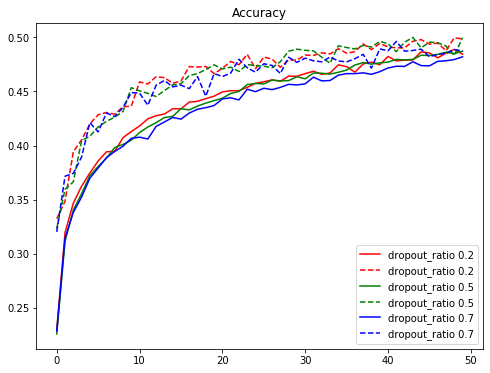

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()